# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [3]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [4]:
def draw_line(points_left, points_mid, points_right, title=""):
    vis = Visualizer()
    vis.add_title(title)
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=30, color=['green'])
    vis.add_point(points_mid, s=30, color=['purple'])
    vis.add_point(points_right, s=30, color=['orange'])
    vis.show()

In [5]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

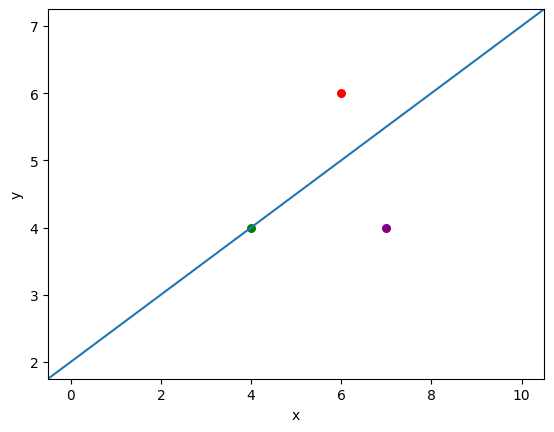

In [6]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funckja biblioteczna)

In [7]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadwratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left: lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    return [(np.random.uniform(left, right), np.random.uniform(left, right)) for elem in range(n)]

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [8]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

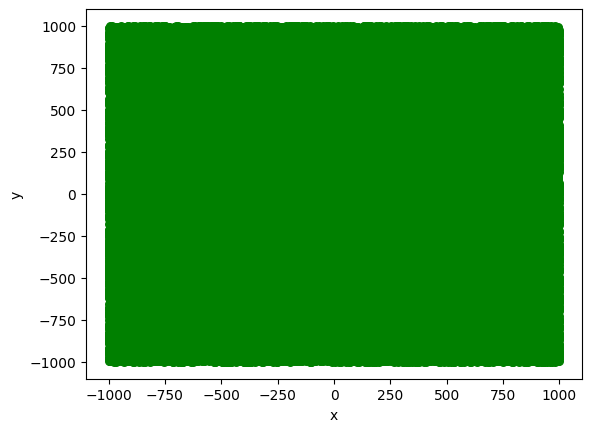

In [9]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [10]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

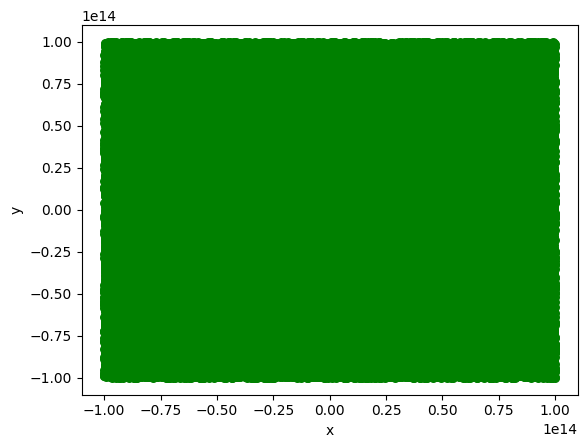

In [11]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [12]:
def generate_circle_points(O, R, n = 1000):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    def point():
        angle = np.random.uniform(0, 2*np.pi)
        x = O[0] + R * np.cos(angle) 
        y = O[1] + R * np.sin(angle)
        return (x, y)

    return [point() for _ in range(n)]

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [13]:
points_c = generate_circle_points((0, 0), 100)

Zwizualizuj wygenerowane punkty.

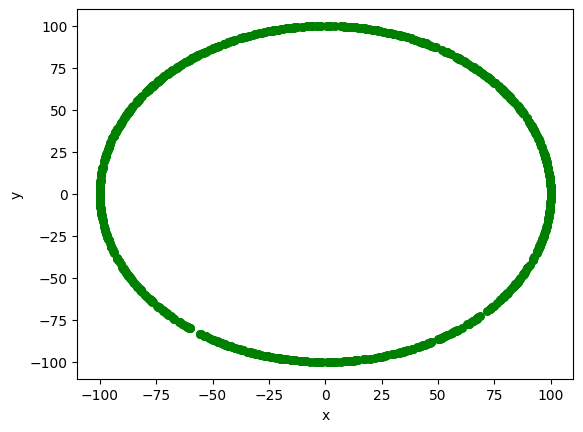

In [14]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [17]:
def generate_collinear_points(a, b, n=1000):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na prostej ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek wektora tworzącego prostą
    :param b: krotka współrzędnych oznaczająca koniec wektora tworzącego prostą
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    def point(vec_ab):
        scalar = np.random.uniform(-500, 500)
        x = scalar * vec_ab[0]
        y = scalar * vec_ab[1] + 0.05
        return (x, y)

    vec_ab = (b[0] - a[0], b[1] - a[1])
    return [point(vec_ab) for _ in range(n)]

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [18]:
points_d= generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

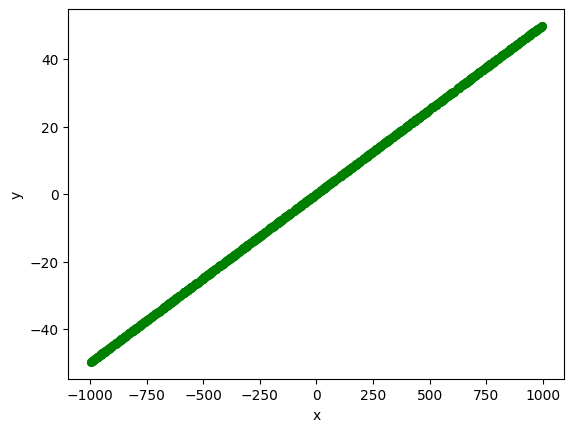

In [19]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [20]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.470s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której strnie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [21]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    return (b[0] - a[0]) * (c[1] - b[1]) - (b[1] - a[1]) * (c[0] - b[0])

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [22]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    pom_array = [[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]]
    return np.linalg.det(pom_array)

Uzupełnij funkcje ```mat_det_2x2```

In [23]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    vec_ab = (a[0] - c[0], a[1] - c[1])
    vec_ac = (b[0] - c[0], b[1] - c[1]) 
    return vec_ab[0] * vec_ac[1] - vec_ab[1] * vec_ac[0]

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [24]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    vec_ab = (a[0] - c[0], a[1] - c[1])
    vec_ac = (b[0] - c[0], b[1] - c[1]) 
    pom_arr = [[vec_ab[0], vec_ab[1]], [vec_ac[0], vec_ac[1]]]
    return np.linalg.det(pom_arr)

Przetestujmy napisane powyżej funkcje.

In [25]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [26]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostej
    """
    on_the_left = []
    on_the_right = []
    on_the_line = []
    for point in points:
        det = mat_det_func(a, b, point)
        if det > eps:
            on_the_left.append(point)
        elif det < -eps:
            on_the_right.append(point)
        else:
            on_the_line.append(point)
    
    return on_the_left, on_the_line, on_the_right

In [27]:
a = (-1.0, 0.0)
b = (1.0, 0.1)
set_precisons = [10 ** -8, 10 ** -12, 10 ** -16]
det_func = [mat_det_3x3, mat_det_3x3_lib, mat_det_2x2, mat_det_2x2_lib]
func_names = ["mat_det_3x3", "mat_det_3x3_lib", "mat_det_2x2", "mat_det_2x2_lib"]
prec_names = ["10^-8", "10^-12", "10^-16"]

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [1]:
for i in range(0, 4):
    for j in range(0, 3):
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(points_a, a, b, det_func[i], set_precisons[j])
        print(func_names[i], len(classified_points_left),len(classified_points_mid), len(classified_points_right), f"{set_precisons[j]:e}")
        draw_line(classified_points_left, classified_points_mid, classified_points_right, "funkcja: " + func_names[i] + ', eps=' + prec_names[j])


NameError: name 'categorize_points' is not defined

mat_det_3x3 50148 0 49852 1.000000e-08
mat_det_3x3 50148 0 49852 1.000000e-12
mat_det_3x3 50148 0 49852 1.000000e-16
mat_det_3x3_lib 50148 0 49852 1.000000e-08
mat_det_3x3_lib 50148 0 49852 1.000000e-12
mat_det_3x3_lib 50148 0 49852 1.000000e-16
mat_det_2x2 50144 6 49850 1.000000e-08
mat_det_2x2 50144 6 49850 1.000000e-12
mat_det_2x2 50144 6 49850 1.000000e-16
mat_det_2x2_lib 50143 9 49848 1.000000e-08
mat_det_2x2_lib 50143 9 49848 1.000000e-12
mat_det_2x2_lib 50143 9 49848 1.000000e-16


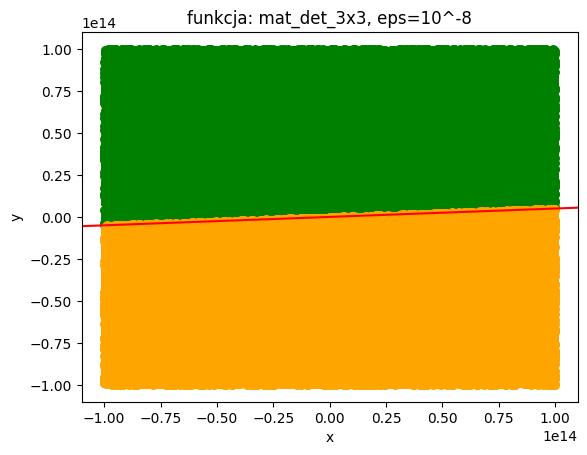

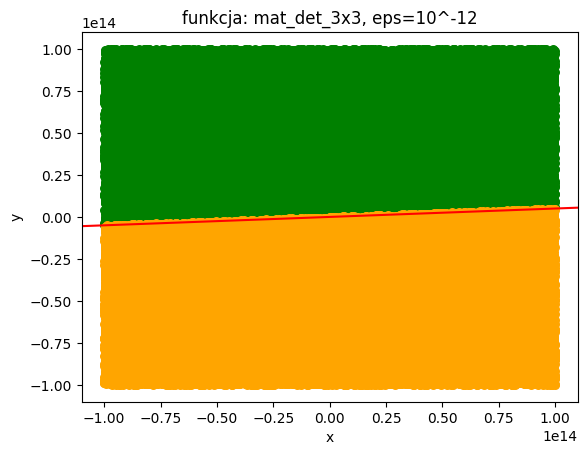

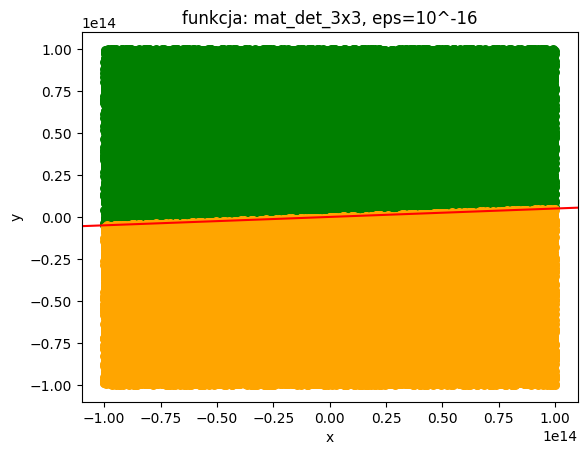

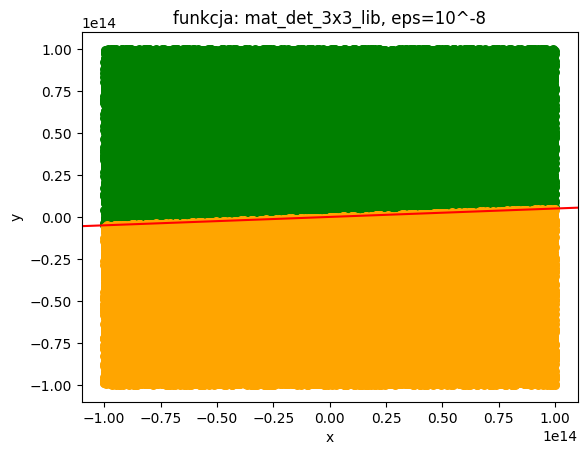

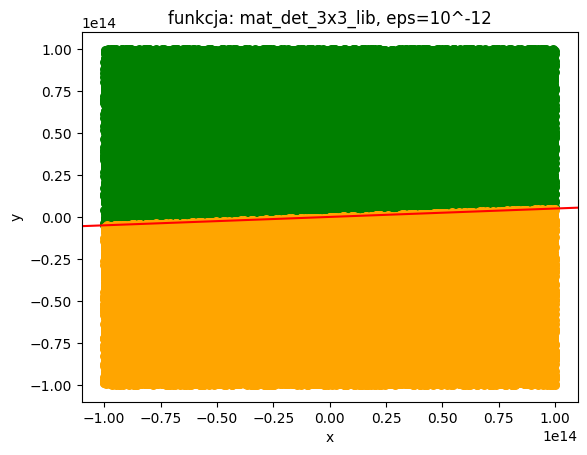

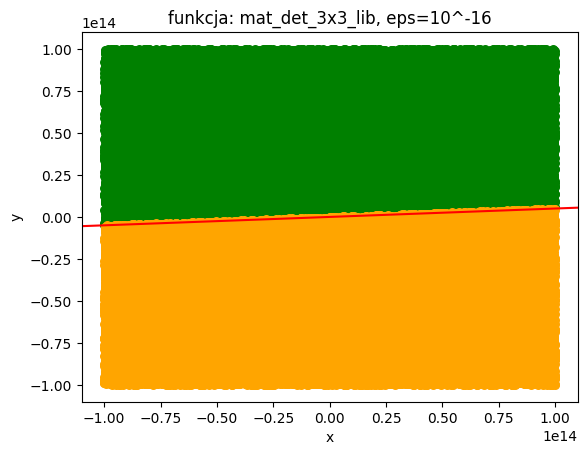

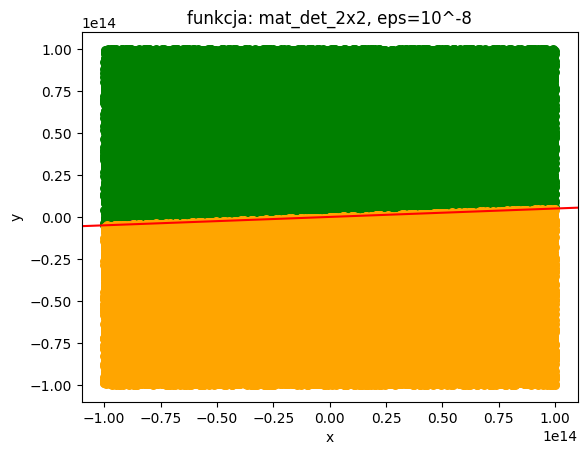

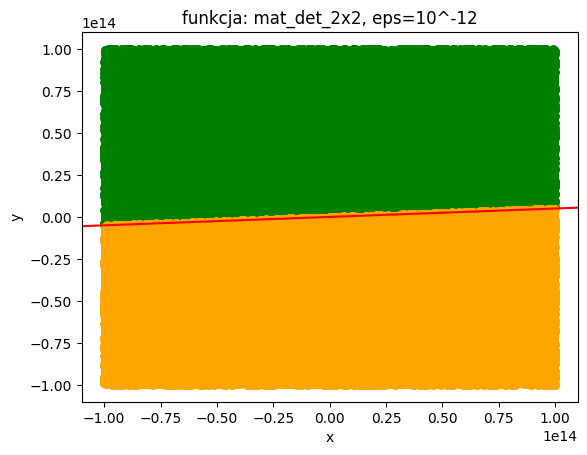

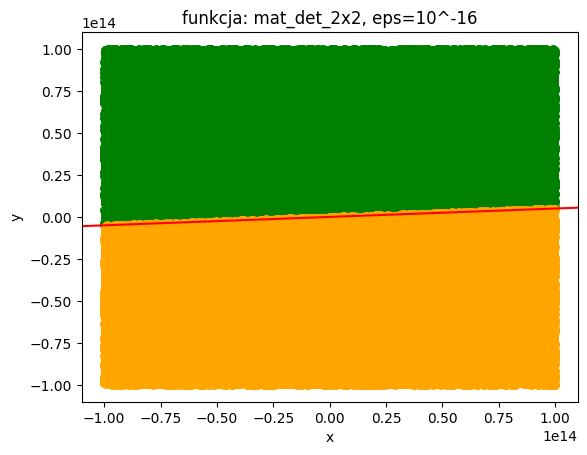

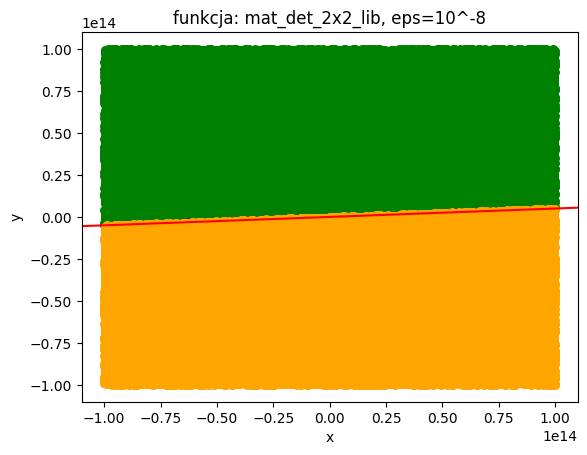

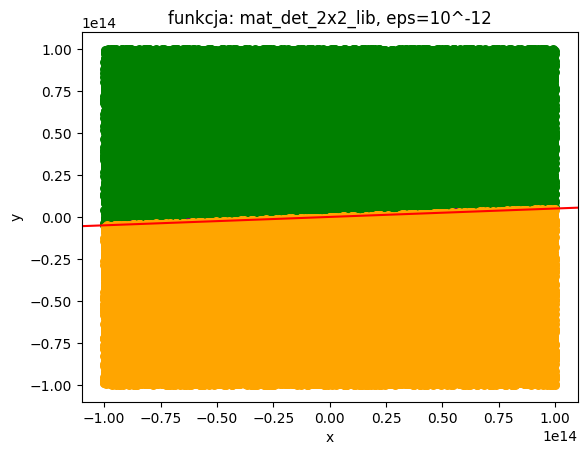

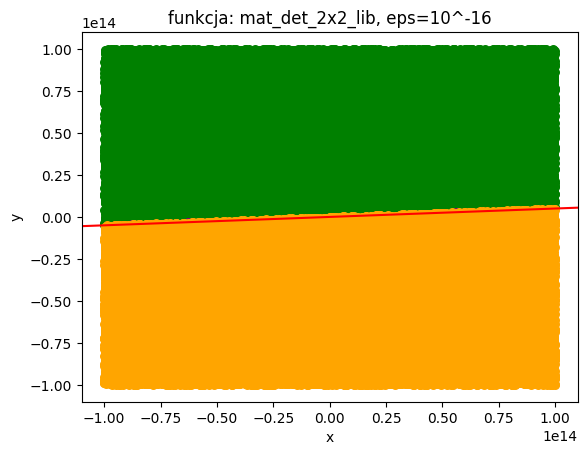

In [29]:
for i in range(0, 4):
    for j in range(0, 3):
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(points_b, a, b, det_func[i], set_precisons[j])
        print(func_names[i], len(classified_points_left),len(classified_points_mid), len(classified_points_right), f"{set_precisons[j]:e}")
        draw_line(classified_points_left, classified_points_mid, classified_points_right, "funkcja: " + func_names[i] + ', eps=' + prec_names[j])


mat_det_3x3 542 0 458 1.000000e-08
mat_det_3x3 542 0 458 1.000000e-12
mat_det_3x3 542 0 458 1.000000e-16
mat_det_3x3_lib 542 0 458 1.000000e-08
mat_det_3x3_lib 542 0 458 1.000000e-12
mat_det_3x3_lib 542 0 458 1.000000e-16
mat_det_2x2 542 0 458 1.000000e-08
mat_det_2x2 542 0 458 1.000000e-12
mat_det_2x2 542 0 458 1.000000e-16
mat_det_2x2_lib 542 0 458 1.000000e-08
mat_det_2x2_lib 542 0 458 1.000000e-12
mat_det_2x2_lib 542 0 458 1.000000e-16


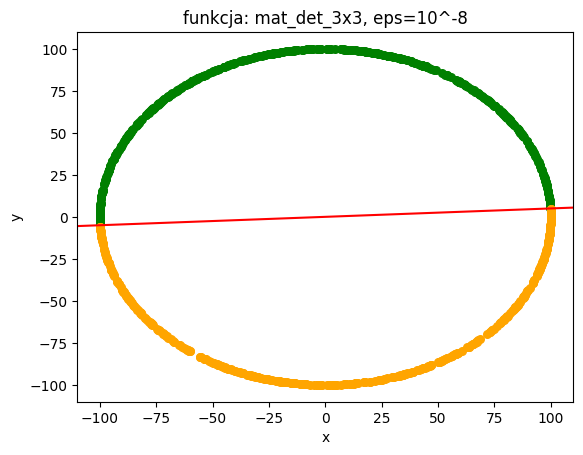

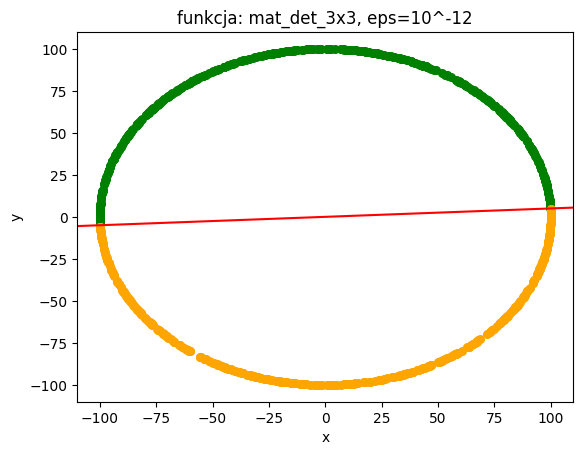

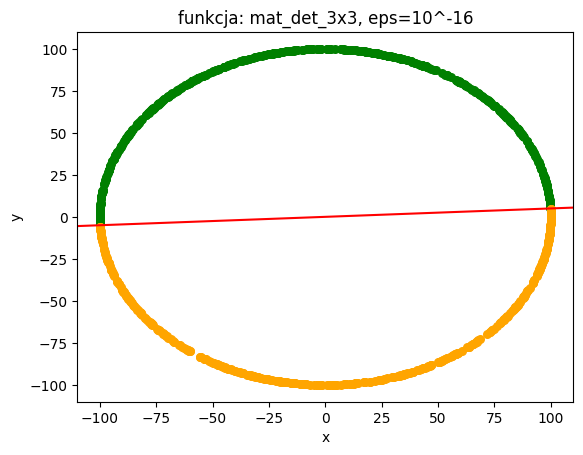

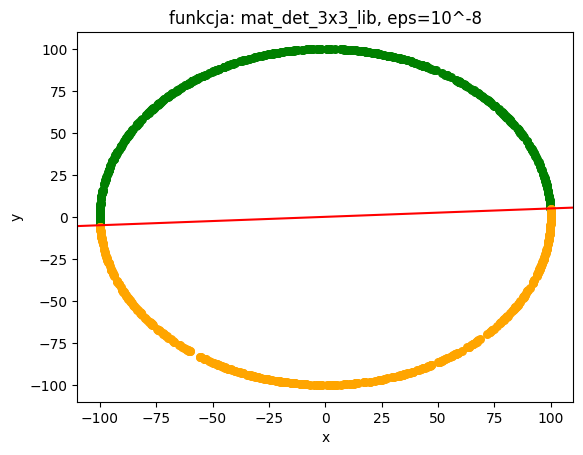

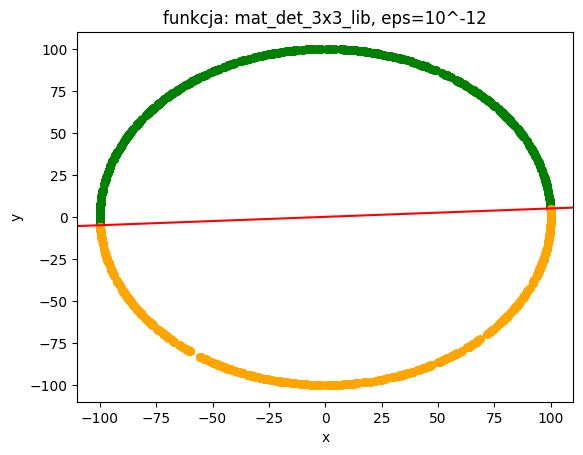

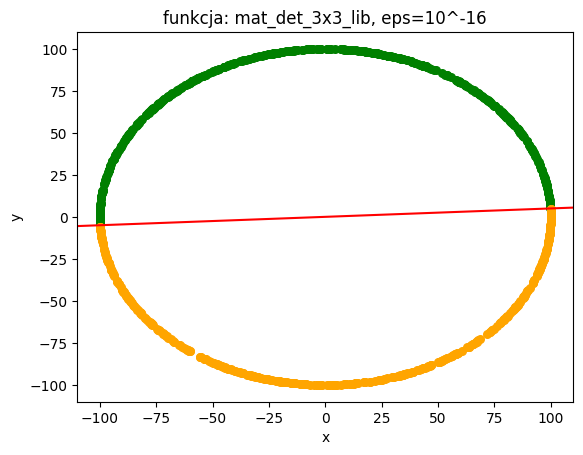

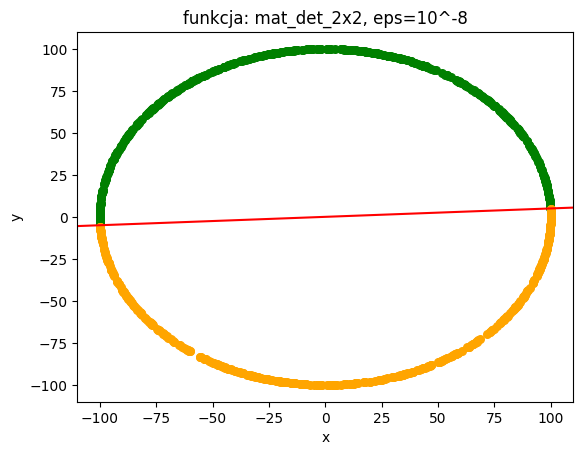

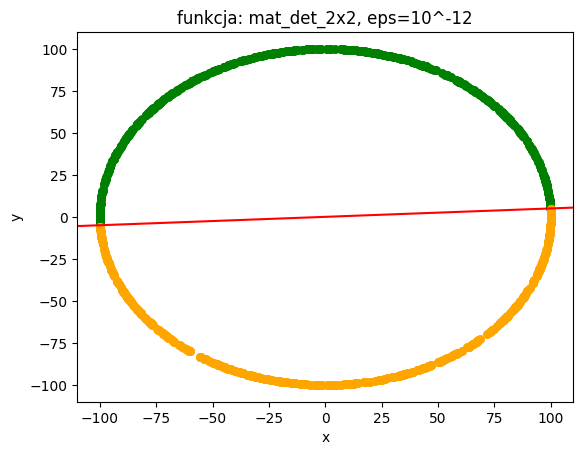

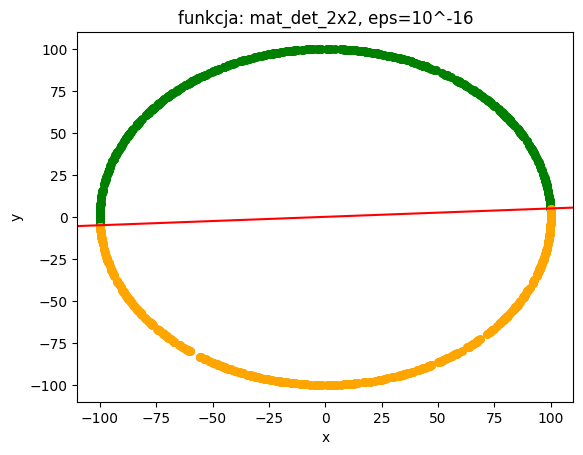

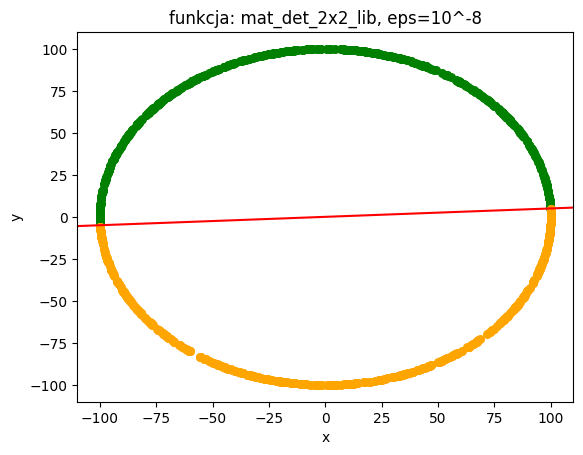

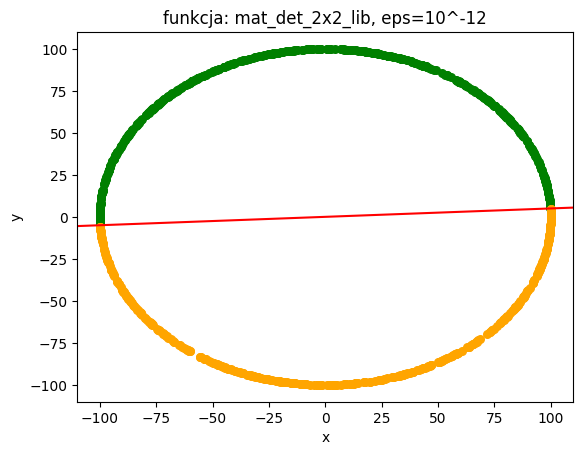

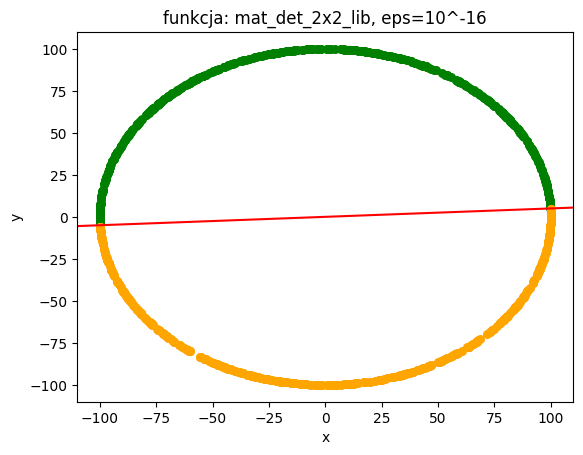

In [30]:
for i in range(0, 4):
    for j in range(0, 3):
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(points_c, a, b, det_func[i], set_precisons[j])
        print(func_names[i], len(classified_points_left),len(classified_points_mid), len(classified_points_right), f"{set_precisons[j]:e}")
        draw_line(classified_points_left, classified_points_mid, classified_points_right, "funkcja: " + func_names[i] + ', eps=' + prec_names[j])


mat_det_3x3 0 1000 0 1.000000e-08
mat_det_3x3 0 1000 0 1.000000e-12
mat_det_3x3 132 593 275 1.000000e-16
mat_det_3x3_lib 0 1000 0 1.000000e-08
mat_det_3x3_lib 0 1000 0 1.000000e-12
mat_det_3x3_lib 383 311 306 1.000000e-16
mat_det_2x2 0 1000 0 1.000000e-08
mat_det_2x2 80 850 70 1.000000e-12
mat_det_2x2 152 700 148 1.000000e-16
mat_det_2x2_lib 0 1000 0 1.000000e-08
mat_det_2x2_lib 103 814 83 1.000000e-12
mat_det_2x2_lib 157 703 140 1.000000e-16


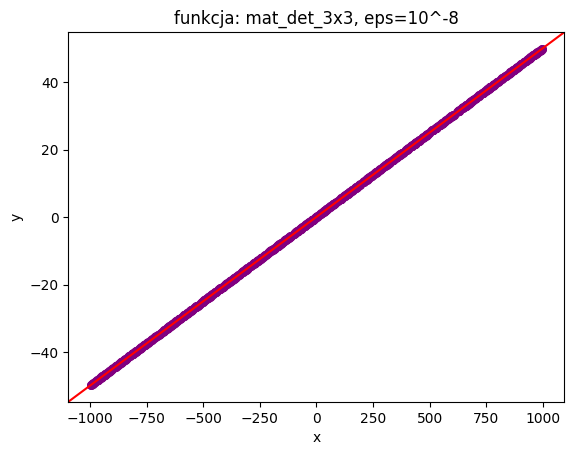

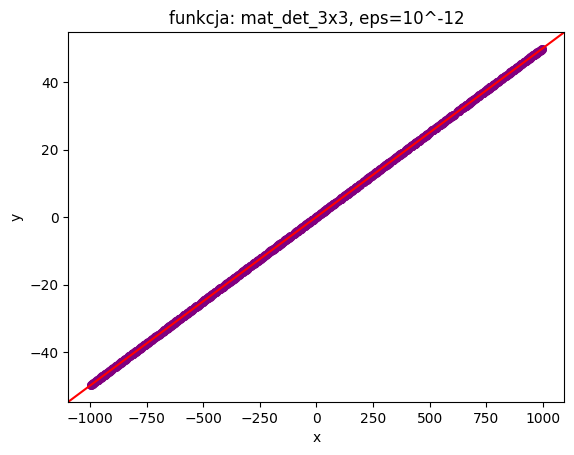

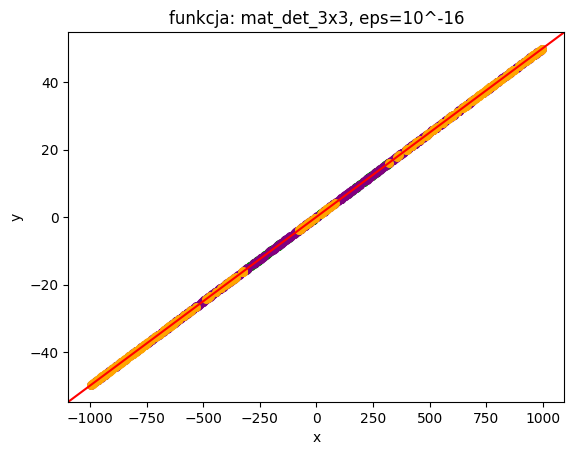

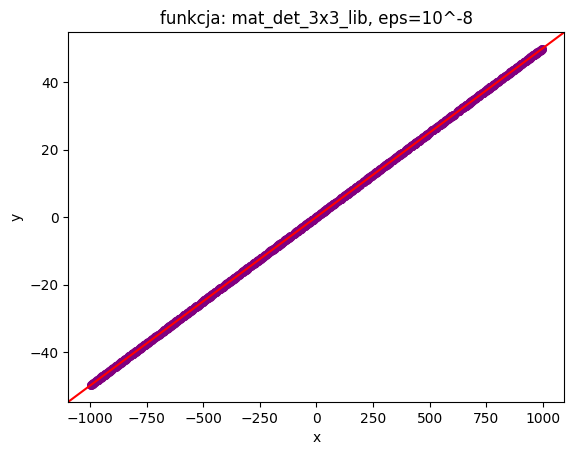

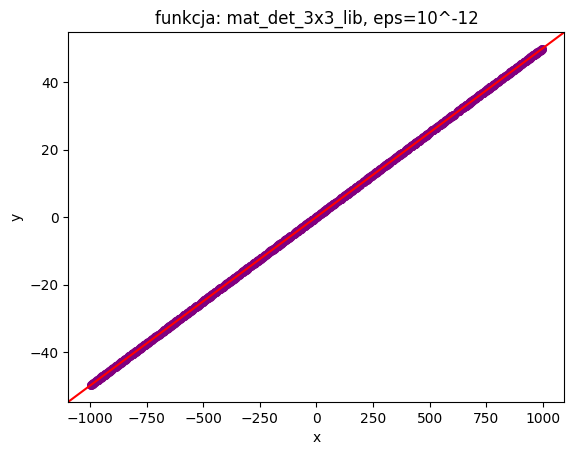

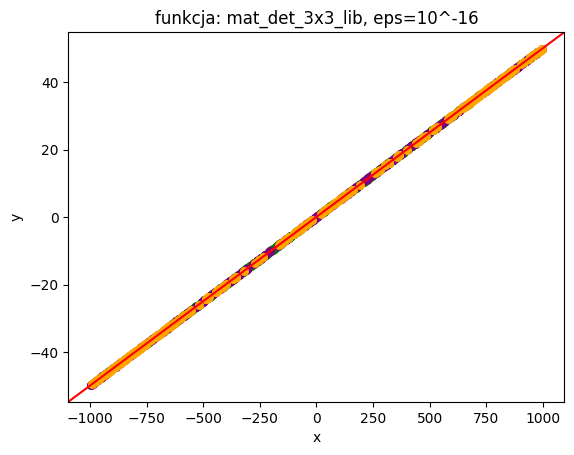

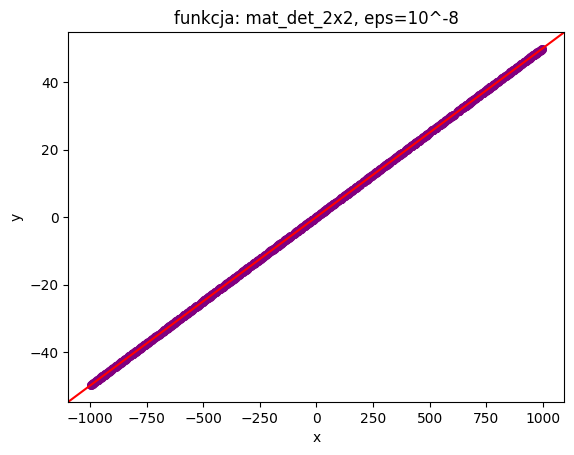

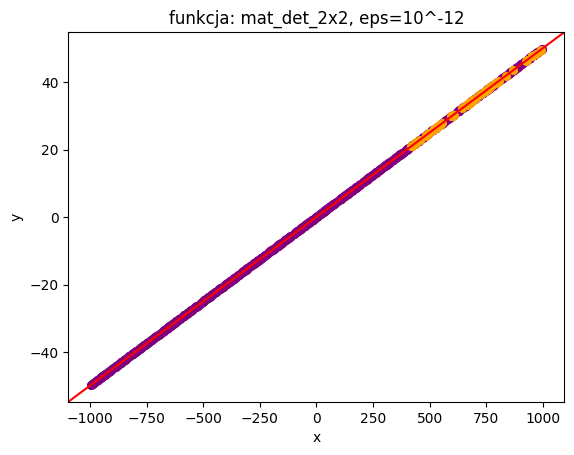

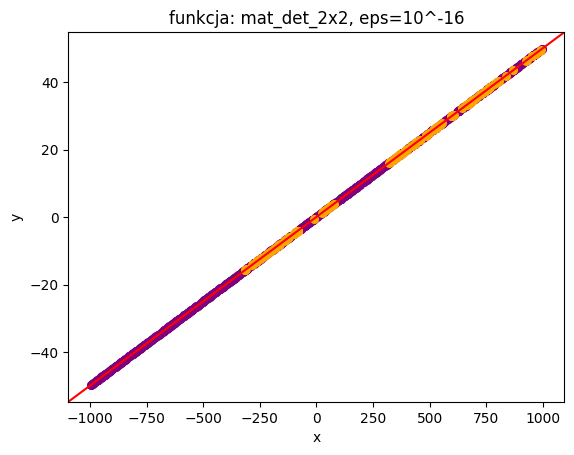

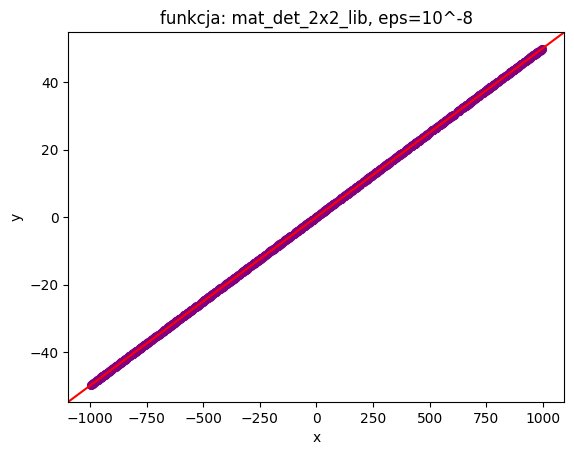

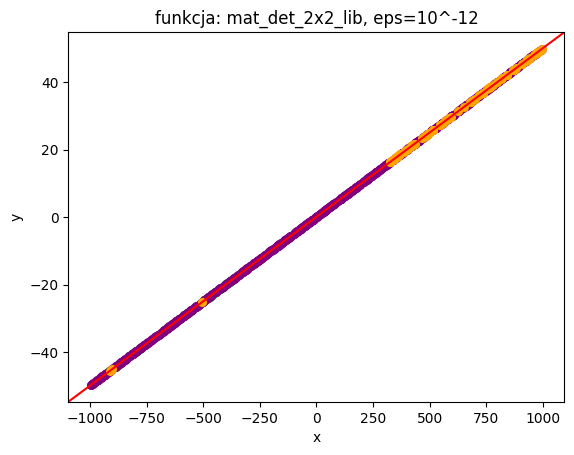

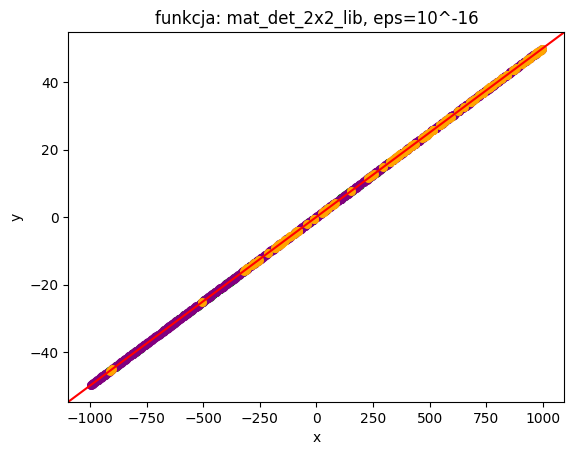

In [31]:
for i in range(0, 4):
    for j in range(0, 3):
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(points_d, a, b, det_func[i], set_precisons[j])
        print(func_names[i], len(classified_points_left),len(classified_points_mid), len(classified_points_right), f"{set_precisons[j]:e}")
        draw_line(classified_points_left, classified_points_mid, classified_points_right, "funkcja: " + func_names[i] + ', eps=' + prec_names[j])


Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [32]:
points_a_float32 = np.float32(points_a)
points_b_float32 = np.float32(points_b)
points_c_float32 = np.float32(points_c)
points_d_float32 = np.float32(points_d)

mat_det_3x3 49984 0 50016 1.000000e-08
mat_det_3x3 49984 0 50016 1.000000e-12
mat_det_3x3 49984 0 50016 1.000000e-16
mat_det_3x3_lib 49984 0 50016 1.000000e-08
mat_det_3x3_lib 49984 0 50016 1.000000e-12
mat_det_3x3_lib 49984 0 50016 1.000000e-16
mat_det_2x2 49984 0 50016 1.000000e-08
mat_det_2x2 49984 0 50016 1.000000e-12
mat_det_2x2 49984 0 50016 1.000000e-16
mat_det_2x2_lib 49984 0 50016 1.000000e-08
mat_det_2x2_lib 49984 0 50016 1.000000e-12
mat_det_2x2_lib 49984 0 50016 1.000000e-16


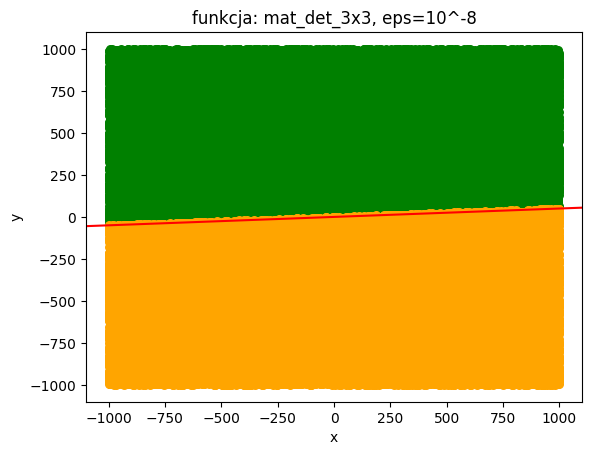

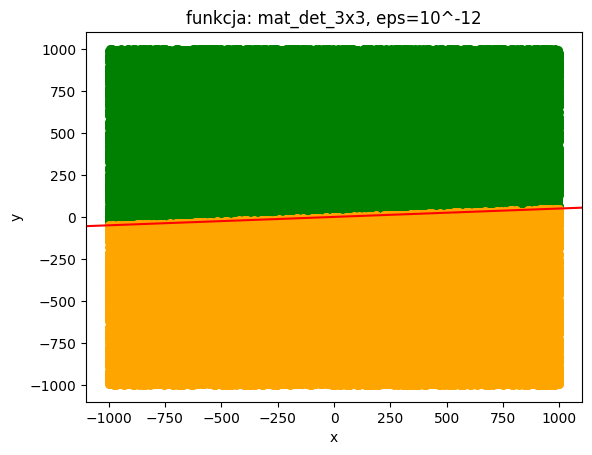

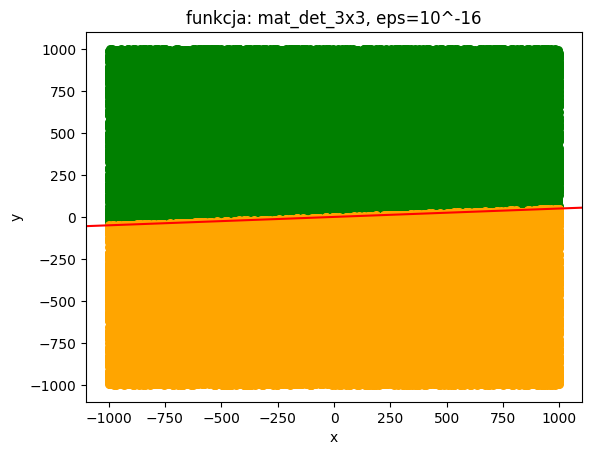

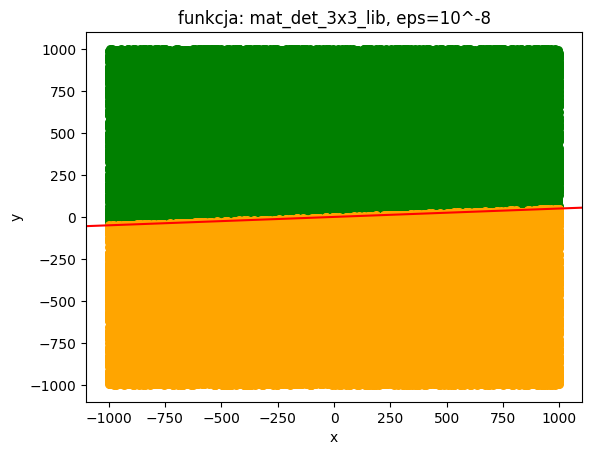

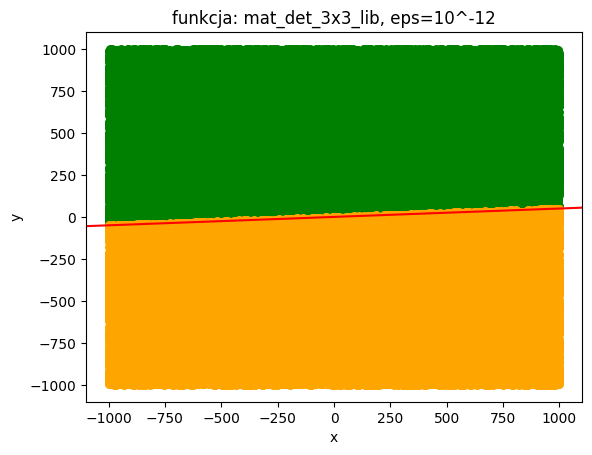

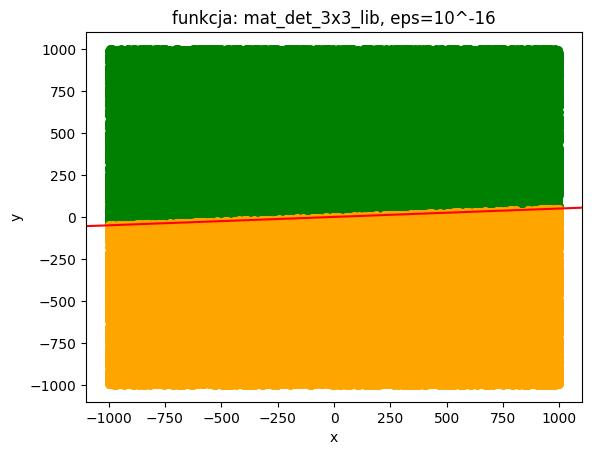

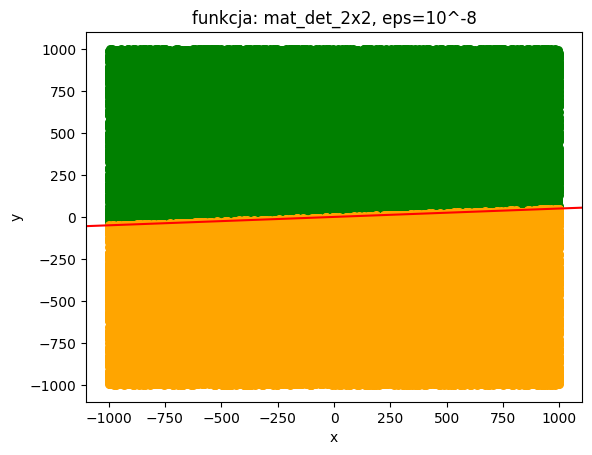

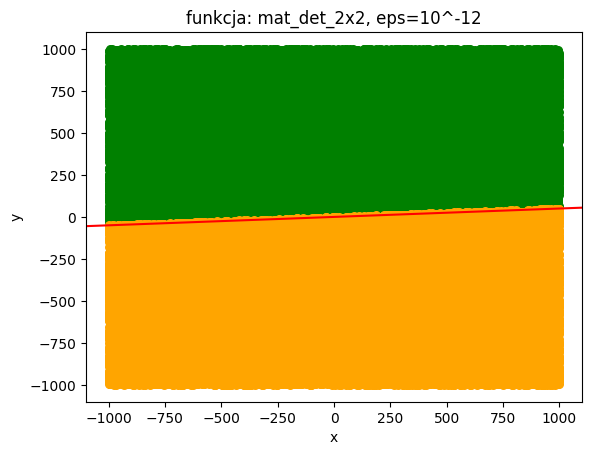

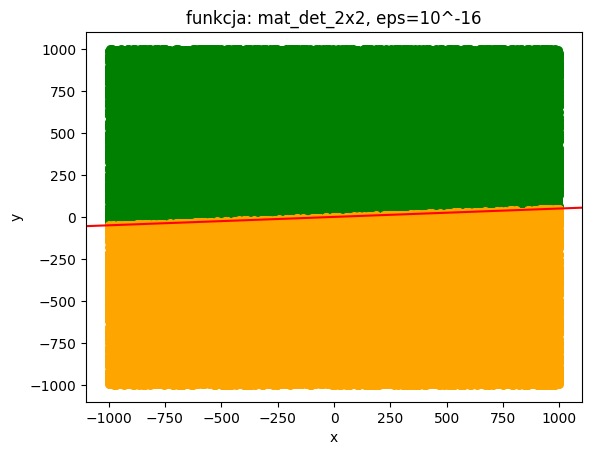

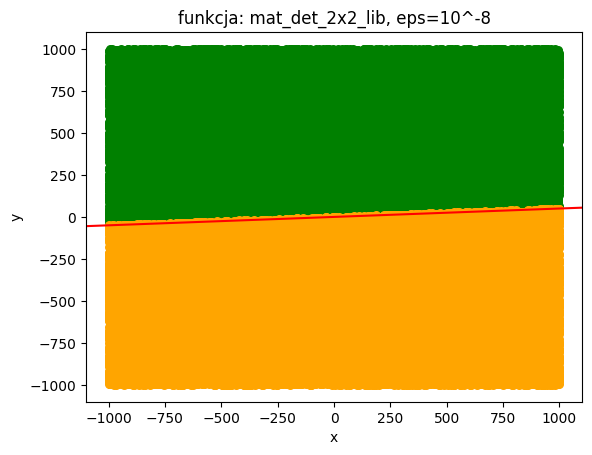

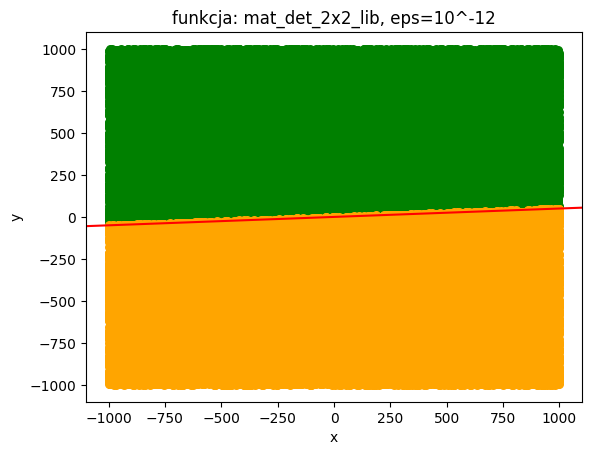

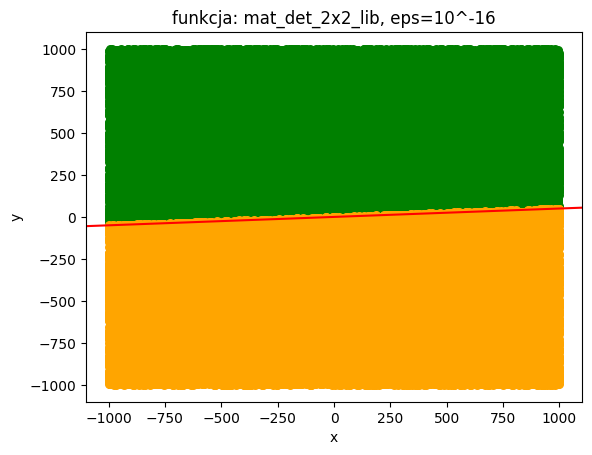

In [33]:
for i in range(0, 4):
    for j in range(0, 3):
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(points_a_float32, a, b, det_func[i], set_precisons[j])
        print(func_names[i], len(classified_points_left),len(classified_points_mid), len(classified_points_right), f"{set_precisons[j]:e}")
        draw_line(classified_points_left, classified_points_mid, classified_points_right, "funkcja: " + func_names[i] + ', eps=' + prec_names[j])

mat_det_3x3 50148 0 49852 1.000000e-08
mat_det_3x3 50148 0 49852 1.000000e-12
mat_det_3x3 50148 0 49852 1.000000e-16
mat_det_3x3_lib 50148 0 49852 1.000000e-08
mat_det_3x3_lib 50148 0 49852 1.000000e-12
mat_det_3x3_lib 50148 0 49852 1.000000e-16
mat_det_2x2 0 100000 0 1.000000e-08
mat_det_2x2 0 100000 0 1.000000e-12
mat_det_2x2 0 100000 0 1.000000e-16
mat_det_2x2_lib 6562 86839 6599 1.000000e-08
mat_det_2x2_lib 6562 86839 6599 1.000000e-12
mat_det_2x2_lib 6562 86839 6599 1.000000e-16


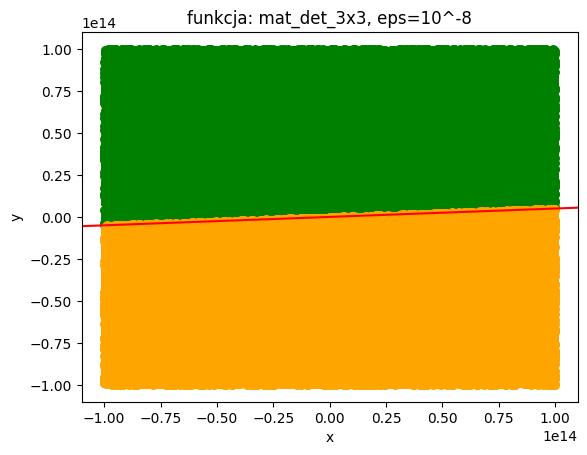

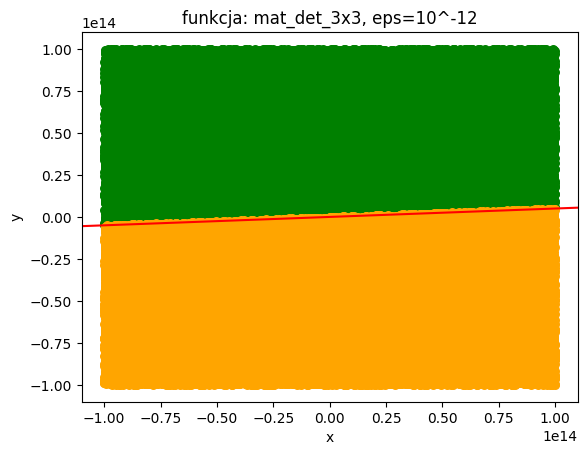

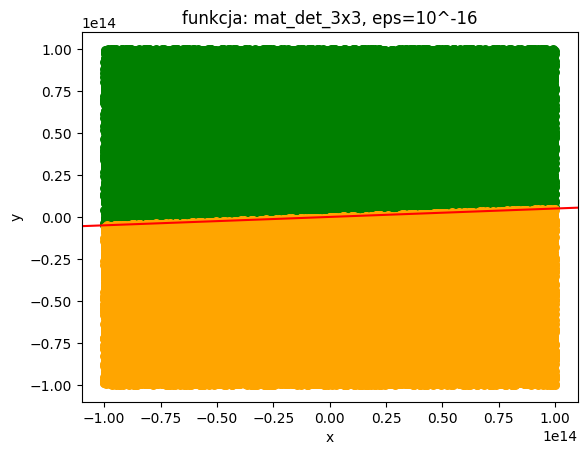

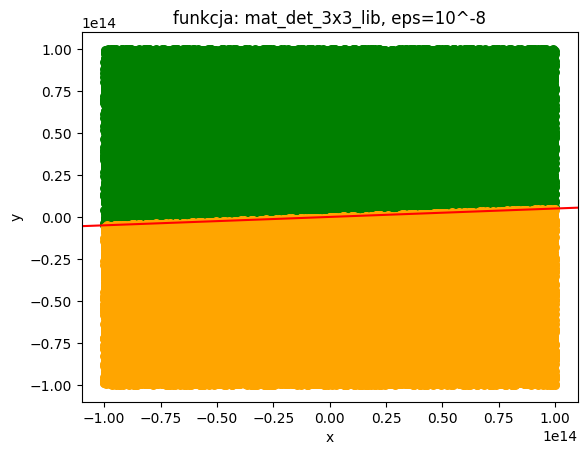

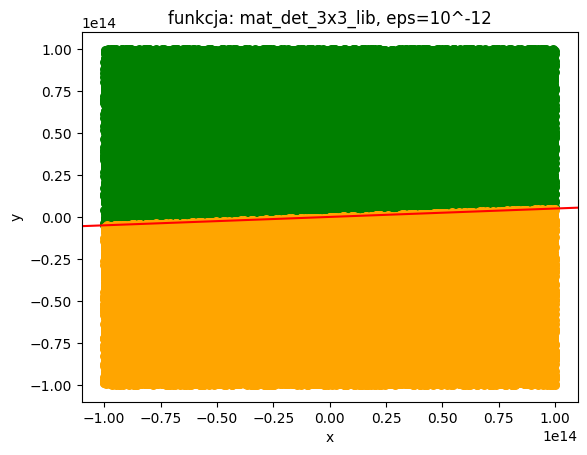

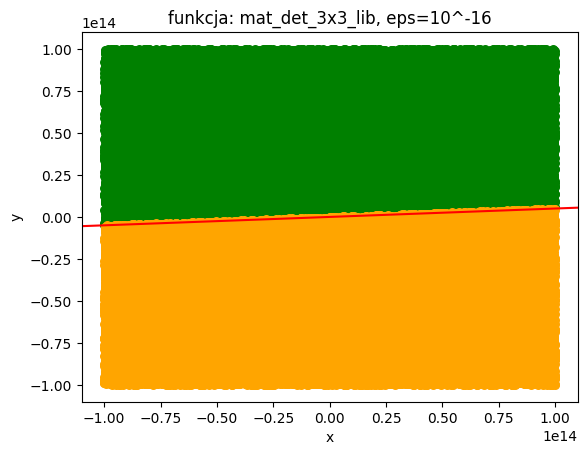

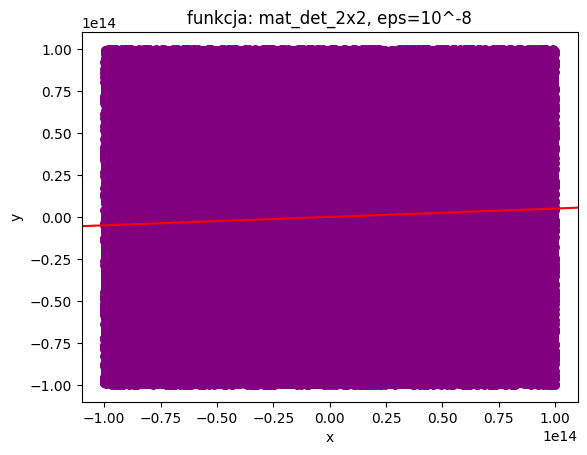

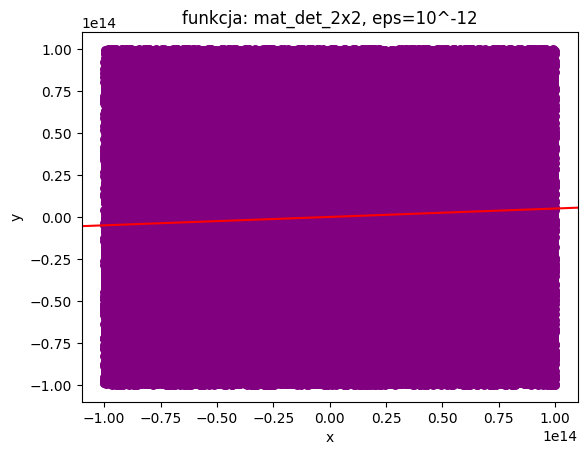

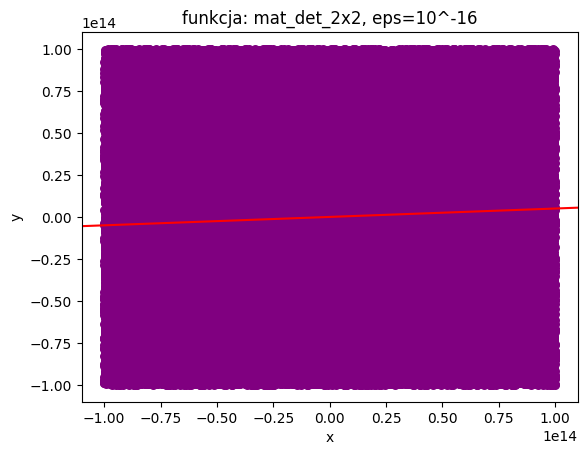

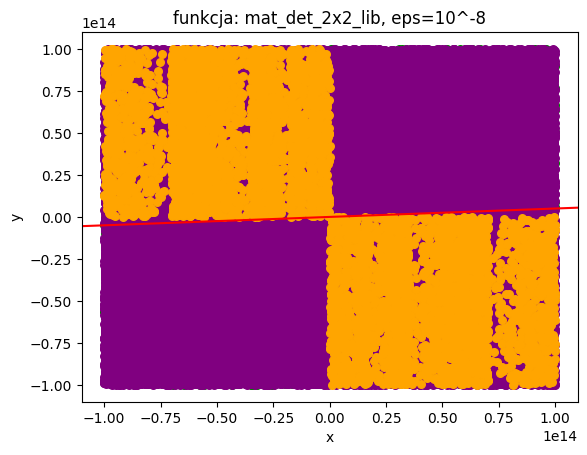

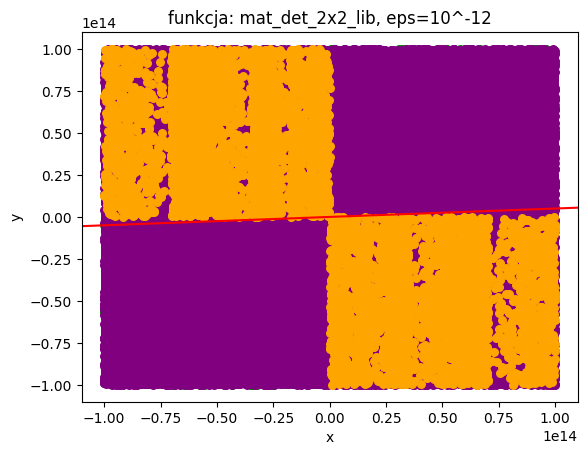

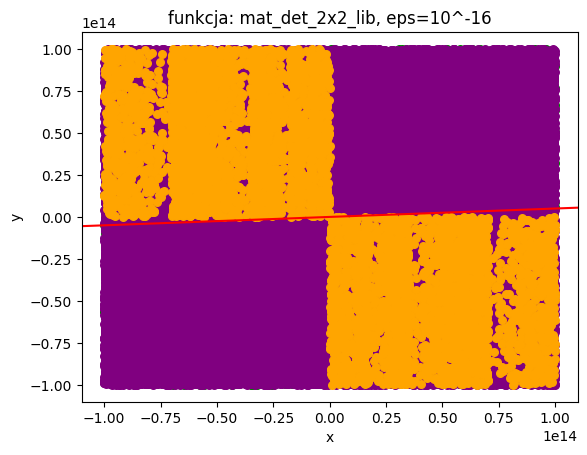

In [34]:
for i in range(0, 4):
    for j in range(0, 3):
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(points_b_float32, a, b, det_func[i], set_precisons[j])
        print(func_names[i], len(classified_points_left),len(classified_points_mid), len(classified_points_right), f"{set_precisons[j]:e}")
        draw_line(classified_points_left, classified_points_mid, classified_points_right, "funkcja: " + func_names[i] + ', eps=' + prec_names[j])

mat_det_3x3 504 0 496 1.000000e-08
mat_det_3x3 504 0 496 1.000000e-12
mat_det_3x3 504 0 496 1.000000e-16
mat_det_3x3_lib 504 0 496 1.000000e-08
mat_det_3x3_lib 504 0 496 1.000000e-12
mat_det_3x3_lib 504 0 496 1.000000e-16
mat_det_2x2 504 0 496 1.000000e-08
mat_det_2x2 504 0 496 1.000000e-12
mat_det_2x2 504 0 496 1.000000e-16
mat_det_2x2_lib 504 0 496 1.000000e-08
mat_det_2x2_lib 504 0 496 1.000000e-12
mat_det_2x2_lib 504 0 496 1.000000e-16


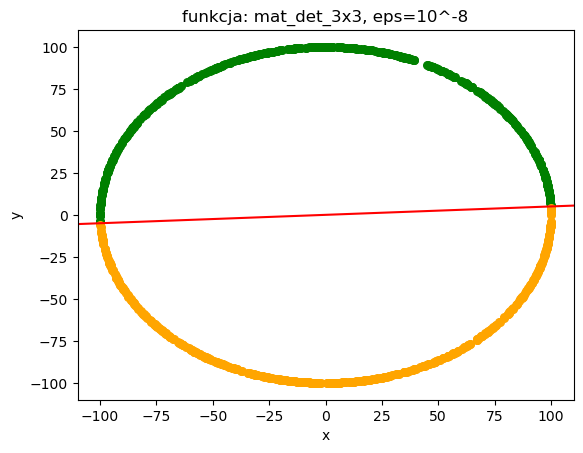

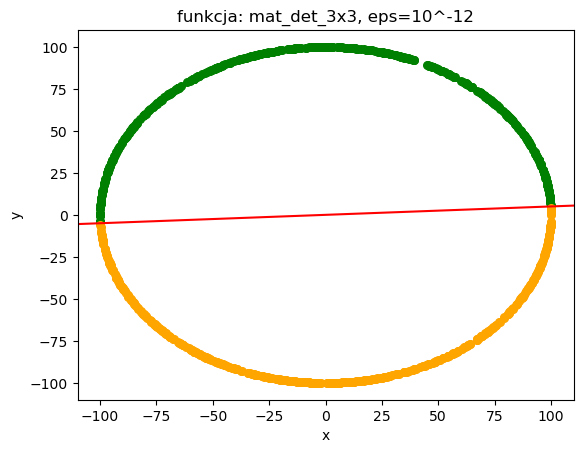

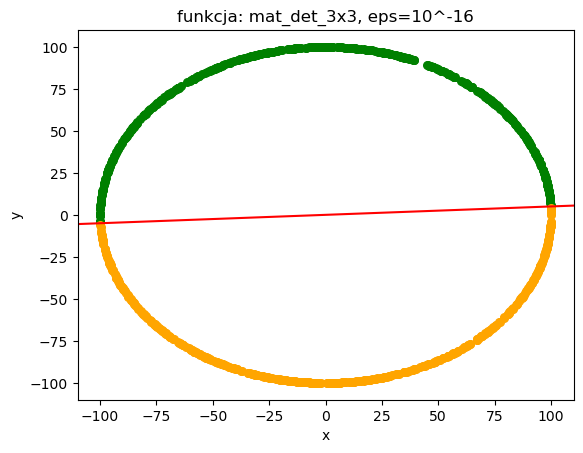

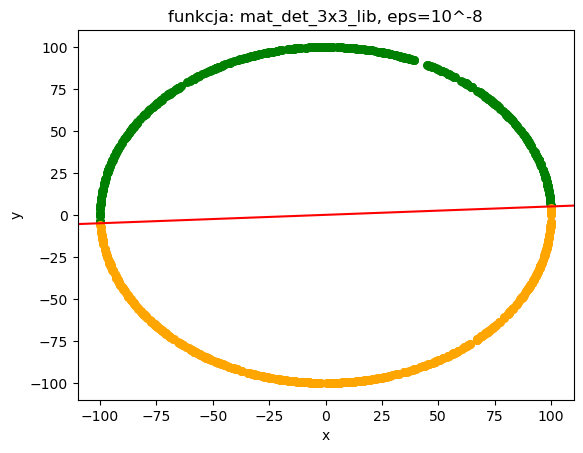

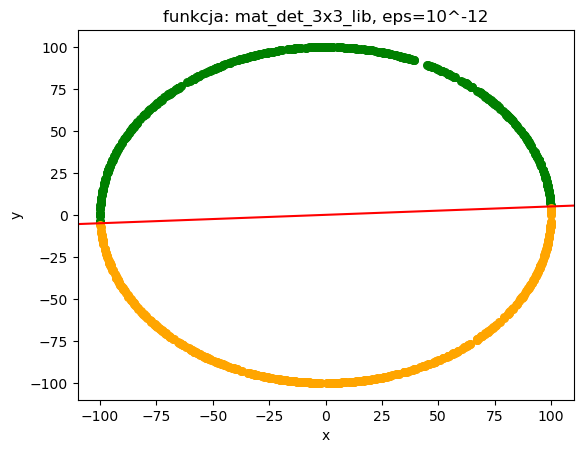

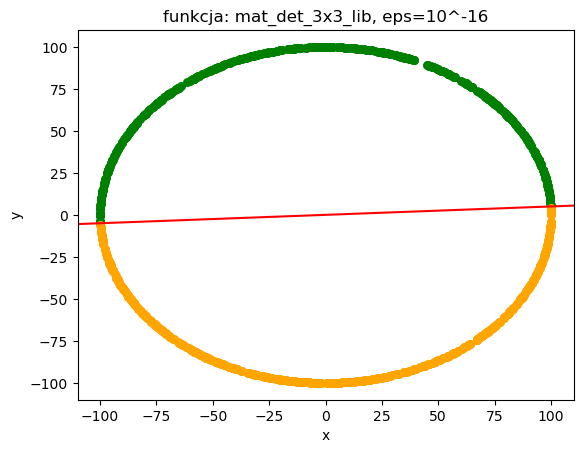

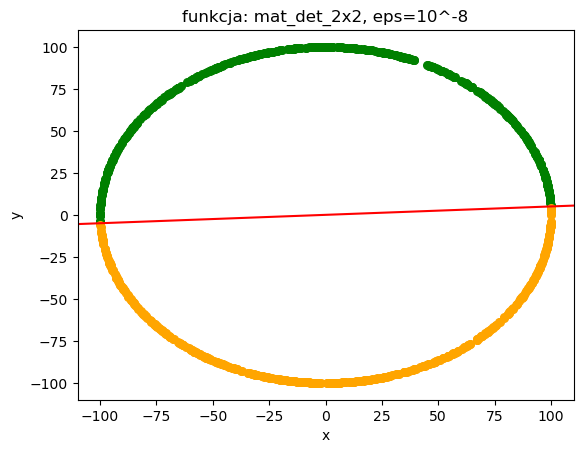

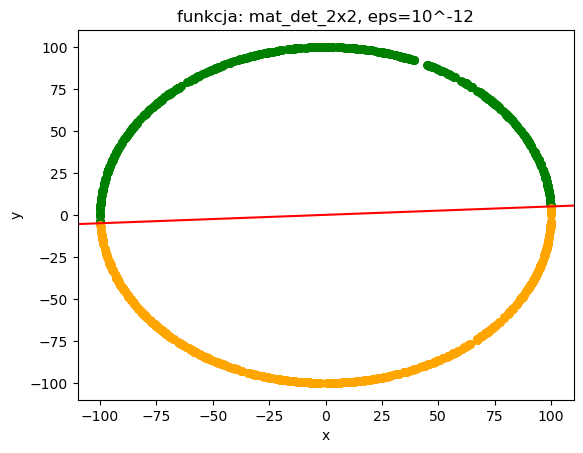

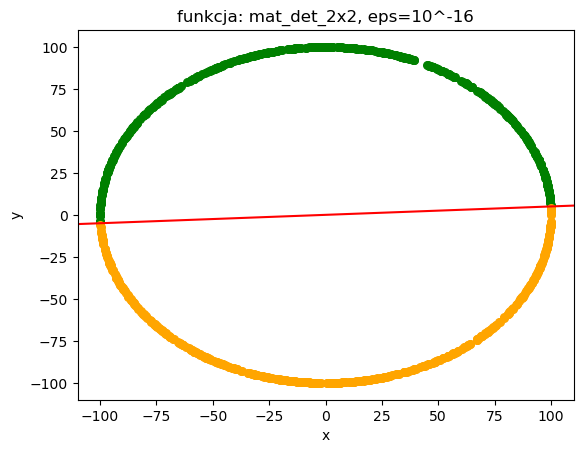

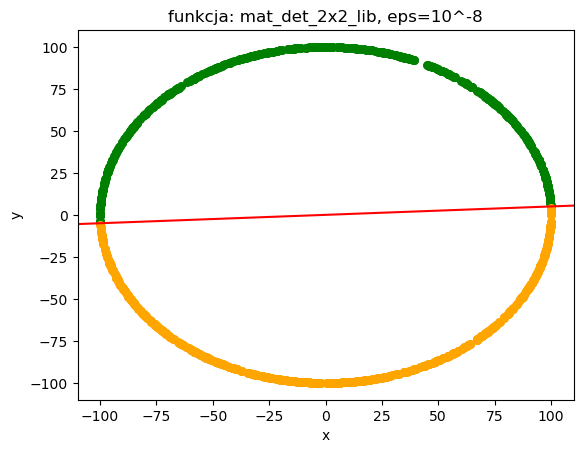

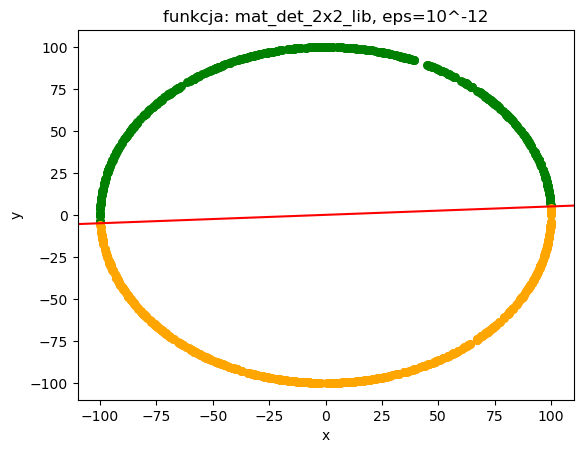

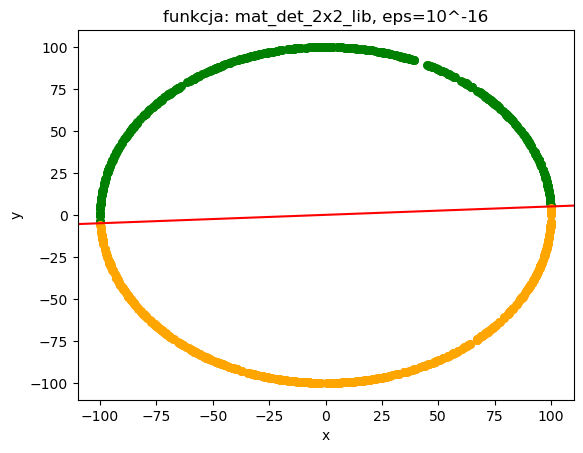

In [64]:
for i in range(0, 4):
    for j in range(0, 3):
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(points_c_float32, a, b, det_func[i], set_precisons[j])
        print(func_names[i], len(classified_points_left),len(classified_points_mid), len(classified_points_right), f"{set_precisons[j]:e}")
        draw_line(classified_points_left, classified_points_mid, classified_points_right, "funkcja: " + func_names[i] + ', eps=' + prec_names[j])

mat_det_3x3 412 195 393 1.000000e-08
mat_det_3x3 412 192 396 1.000000e-12
mat_det_3x3 432 110 458 1.000000e-16
mat_det_3x3_lib 412 195 393 1.000000e-08
mat_det_3x3_lib 412 192 396 1.000000e-12
mat_det_3x3_lib 499 33 468 1.000000e-16
mat_det_2x2 412 195 393 1.000000e-08
mat_det_2x2 412 192 396 1.000000e-12
mat_det_2x2 424 169 407 1.000000e-16
mat_det_2x2_lib 412 195 393 1.000000e-08
mat_det_2x2_lib 429 156 415 1.000000e-12
mat_det_2x2_lib 436 137 427 1.000000e-16


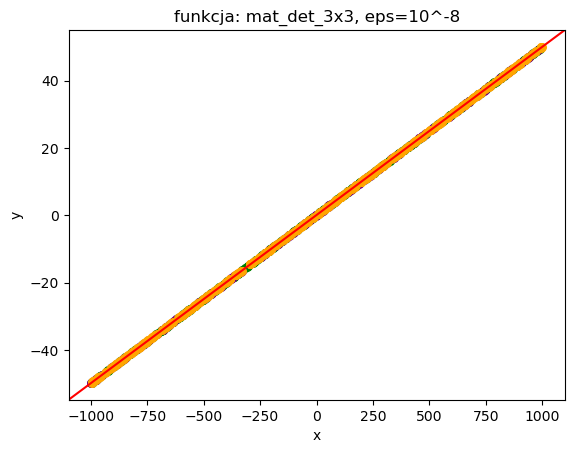

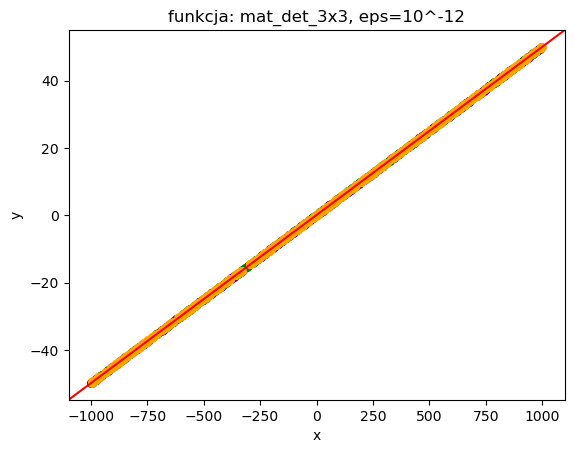

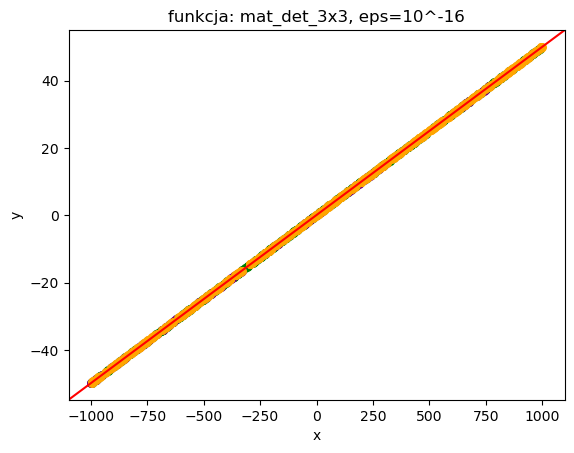

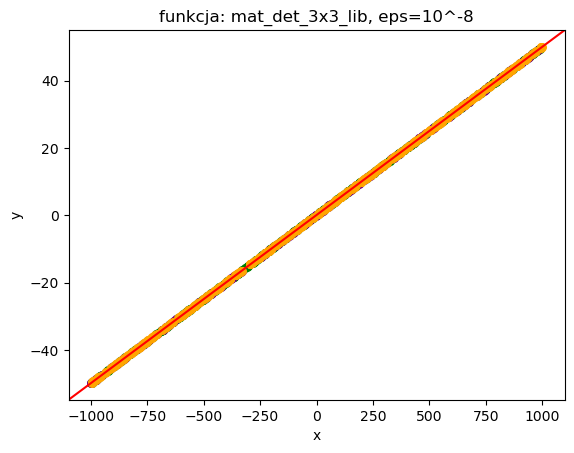

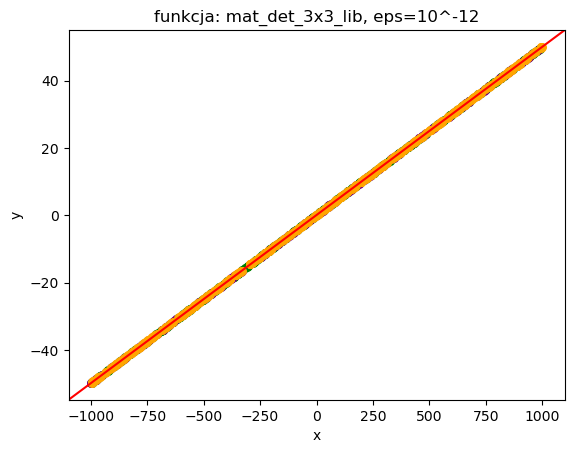

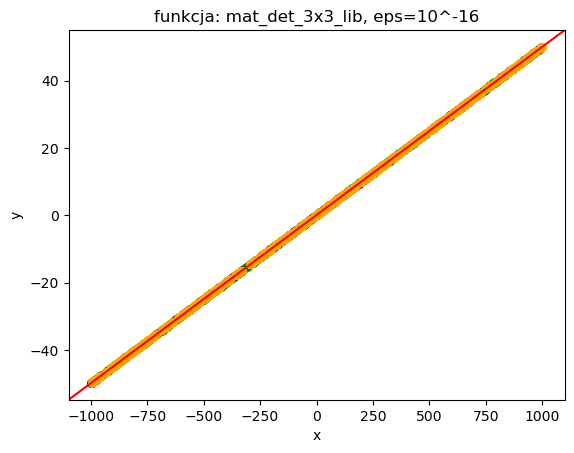

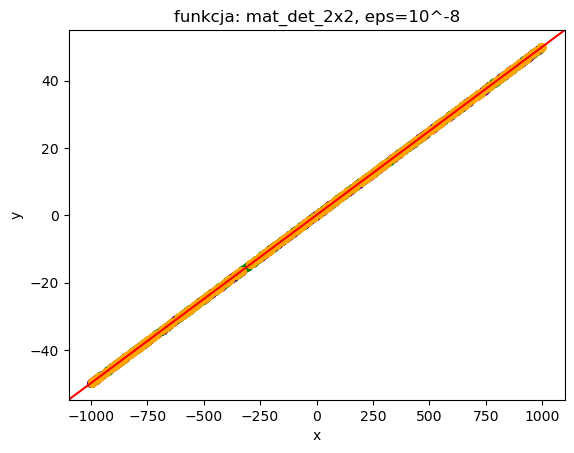

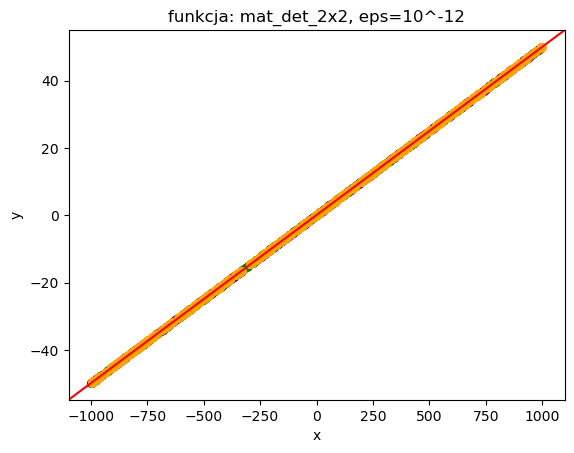

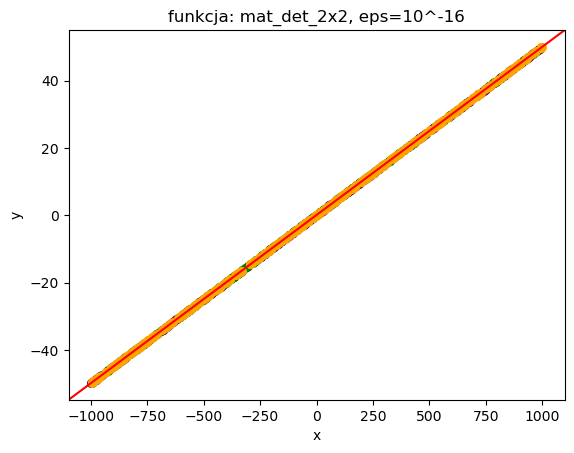

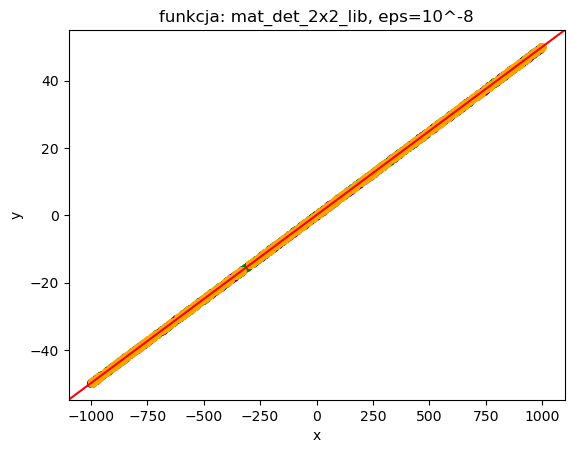

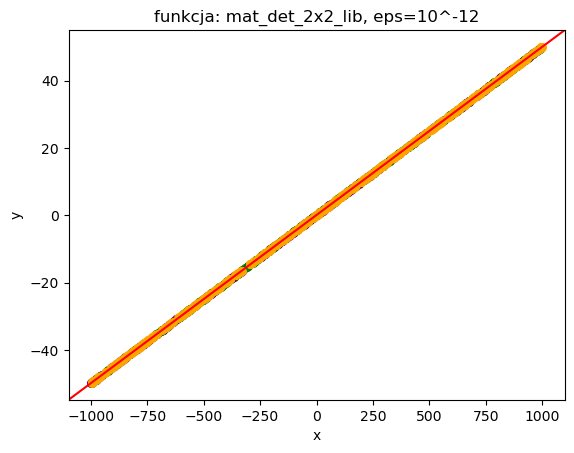

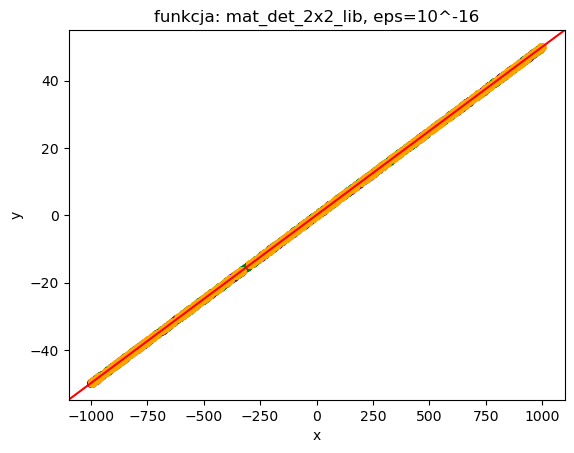

In [65]:
for i in range(0, 4):
    for j in range(0, 3):
        classified_points_left,classified_points_mid,classified_points_right = categorize_points(points_d_float32, a, b, det_func[i], set_precisons[j])
        print(func_names[i], len(classified_points_left),len(classified_points_mid), len(classified_points_right), f"{set_precisons[j]:e}")
        draw_line(classified_points_left, classified_points_mid, classified_points_right, "funkcja: " + func_names[i] + ', eps=' + prec_names[j])